# Exploring billboard data

At a minimum, you must:

Use Pandas to read in your data

Rename column names where appropriate

Describe your data: check the value counts and descriptive statistics

Make use of groupby statements

Utilize Boolean sorting

Assess the validity of your data (missing data, distributions?)


At a maximum, you should strive to:

Produce a blog-post ready description of your lab

State your assumptions about the data

Describe limitations

Consider how you can action this from a stakeholder perspective (radio, record label, fan) (We haven't covered
stakeholder analysis yet)

Include visualization

In [2]:
import pandas as pd

df = pd.read_csv('assets/billboard.csv')
# Let's take a look at our data
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Right off the bat, I am concerned about the column names. The '.' character will potentially be problematic when trying to call column names. Let's replace the '.' with a '_' character instead.

In [3]:
df.columns  =[col.replace('.','_') for col in df.columns]
df.head()

,year,artist_inverted,track,time,genre,date_entered,date_peaked,x1st_week,x2nd_week,x3rd_week,...,x67th_week,x68th_week,x69th_week,x70th_week,x71st_week,x72nd_week,x73rd_week,x74th_week,x75th_week,x76th_week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Much better!

Now let's start looking at the data itself. We can already see there are going to be a considerable amount of NaN in this data set, but that may be okay. I'm not sure if there is a better way to represent a song no longer being on the billboard chart than having an empty cell there. Let's take a closer look and find out.

In [4]:
df.describe()

,year,x1st_week,x2nd_week,x3rd_week,x4th_week,x5th_week,x6th_week,x7th_week,x8th_week,x9th_week,...,x67th_week,x68th_week,x69th_week,x70th_week,x71st_week,x72nd_week,x73rd_week,x74th_week,x75th_week,x76th_week
count,317.0,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,253.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2000.0,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,46.343874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,27.136419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.0,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2000.0,74.000000,63.000000,53.000000,44.750000,38.750000,33.750000,30.000000,27.000000,26.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2000.0,81.000000,73.000000,66.000000,61.000000,57.000000,51.500000,47.000000,45.500000,42.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.0,91.000000,84.000000,79.000000,76.000000,73.250000,72.250000,67.000000,67.000000,67.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2000.0,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Well that is interesting... the last 10 columns don't appear to have any data points at all?! How many of these empty columsn are there? Let's look a little closer.

Let's try to select all columns were there is not a single data point.

In [5]:
df.count().sort_values(ascending=True).head(15)

x76th_week    0
x66th_week    0
x67th_week    0
x68th_week    0
x69th_week    0
x75th_week    0
x71st_week    0
x72nd_week    0
x73rd_week    0
x74th_week    0
x70th_week    0
x65th_week    1
x54th_week    2
x56th_week    2
x57th_week    2
dtype: int64

This is beginning to make sense. The dataset has the weeks a song was on the billboard chart for, no songs made it  past week 70. It may make sense for us to just remove these columns from the dataset, but they aren't causing any harm at the moment.

I see one song that made it to week 65. I wonder what song that was... let's keep exploring our data and maybe we'll find out.

In [6]:
# Let's start by creating a new column that will help encapsolate some interesting information for us. We can call
# it weeks_on_chart.

# First we can grab a data frame of just the weeks to make things a little easier to work with.

df_weeks = df[list(filter(lambda x: x.startswith('x'), df.columns))].transpose()

# We can now transpose the dataframe and count. The index should still match our original dataframe, so we can
# tack it on with a new name.
df['weeks_on_chart'] = [int(c) for c in df_weeks.count()] # I also need to convert the counts to ints

#Let's sort our dataframe and look at what the longest running song was
top_5 = df.sort_values('weeks_on_chart', ascending=False).head()

Let's take a look the runs of these songs

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

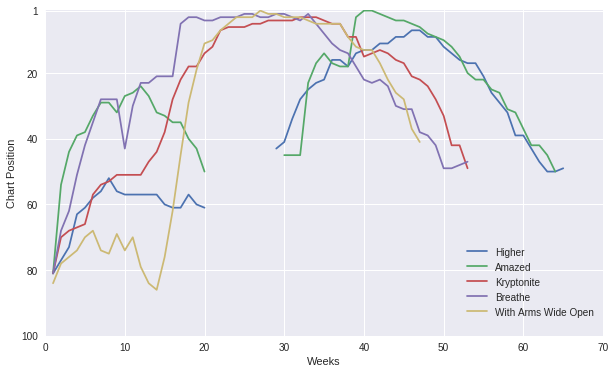

In [8]:
#df_weeks.index = ['Week ' + str(s) for s in (range(1, len(df_weeks) + 1))]
df_weeks.index = range(1, len(df_weeks) + 1)
df_weeks.index.name = 'Weeks'
df_weeks.columns = df['track']
df_weeks[top_5.track].plot(style='-')
ax = plt.gca()
plt.ylim(0.7,100)
plt.xlim(0,70)
ax.set_yticks([1,20,40,60,80,100])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_ylabel('Chart Position')
plt.legend(bbox_to_anchor=(1, .3))
fig = plt.gcf()
fig.set_size_inches(10, 6)
fig.savefig('run_by_week.png', dpi=100)


Well this is a somewhat deceptive graphic. The x axis is a different date for each song. This is what there respective runs looked like over time. It would be nice to converet the x axis to a time series and plot this again.

Also, I wonder what happened between the weeks of 20-30 for both 'Amazed' and 'Higher'. There seems to be a gap in the data. This is something I can investigate further.

Working with timeseries means we are going to need to import datetime. We also need to come up with a range of time for which this data set covers. This means we need to find the earliest date of the earliest data point, and then the latest date of the latest data point and create a timeseries of weeks for the period between those two dates.

In [9]:
import datetime as datetime
# Converting the date_entered of our data set to datetime data.
start_dates = pd.to_datetime(df['date_entered'])
# Now we are finding the earliest date, or the minimum start date. This is the earliest date that we have data for
first_date = min(start_dates)
last_date = max(start_dates)
# Creating a list of dates split into weeks from the earliest a song entered the charts until the last time
date_list = pd.date_range(start=first_date,end=last_date, freq='W')


Now that we have a list of dates split into weeks over the appropriate range we can create a dataframe with time_series as the index and we will use the songs as the columns. We are going to put the placement of a given song during each week in the respective column. If the track was not on the chart for a week we will put a 'None' value instead.

In [10]:
# Initializing new data frame
df_time = pd.DataFrame(columns = df.track, index = date_list)
df_time.index.name = 'Date'

# Transposing data so we can iterate over songs
df_t = df.transpose()
for t in df_t:
    curr_song = df_t[t]
    track = df_weeks[curr_song.track]
    if isinstance(track, type(df)):
        track = track.iloc[:,0]
    # Creating a temp list
    temp = []
    i = 1
    for d in df_time.index:
        # If track has not entered the charts yet, put None
        if d < pd.to_datetime(curr_song.date_entered):
            temp.append(None)
        # Else if find the value for this songs position on the chart for this week in it's run
        # We are counting with i to avoid indexing issues
        elif i < len(df_weeks):
            temp.append(track.iloc[i])
            i+=1
        # Else append None when the songs run is over anyway. This will only hit for songs that entered the chart early
        else:
            temp.append(None)
    # Update our new data frame with our time_series organized data
    df_time[df_t[t].track] = temp

With our now time series indexed data frame plotting with time as our x axis should be super easy!

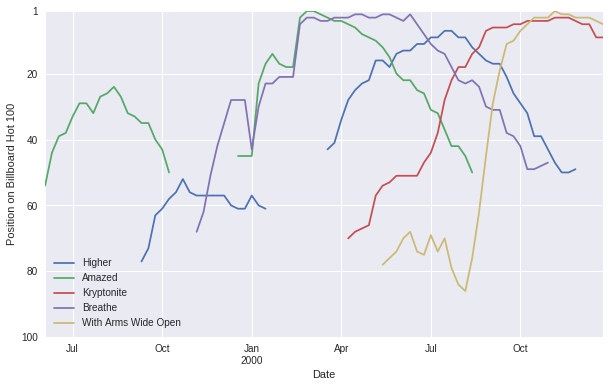

In [14]:
df_time[top_5.track].plot(style='-')
ax = plt.gca()
plt.ylim(1,100)
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_yticks([1,20,40,60,80,100])
plt.ylabel("Position on Billboard Hot 100")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(10, 6)
fig.savefig('run_by_time.png', dpi=100)
plt.show()

In [21]:
# We have a chunk missing from our dataset and I would like to see if I can rebuild it by looking at the other values
# for the missing weeks.
temp = {}
df_t_t = df_time.transpose()
# Creating a dataframe of value counts by date
dict_list = []
for (i,k) in enumerate(df_t_t.columns):
    dict_ = {}
    d = df_t_t.iloc[:,i]
    t = set(df_t_t.iloc[:,i].value_counts().index)
    dict_['date'] = k
    dict_['songs'] = t
    dict_['missing_ranks'] = set(range(1,101)) - t
    temp[i] = (k,t)
    dict_list.append(dict_)

missing_ranks_df = pd.DataFrame(dict_list)

In [28]:
missing_ranks_df

,date,missing_ranks,songs
0,1999-06-06,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{54.0}
1,1999-06-13,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{44.0}
2,1999-06-20,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{39.0}
3,1999-06-27,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{38.0}
4,1999-07-04,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{33.0}
5,1999-07-11,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{29.0}
6,1999-07-18,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{99.0, 29.0}"
7,1999-07-25,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{96.0, 32.0}"
8,1999-08-01,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{96.0, 27.0}"
9,1999-08-08,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{26.0, 100.0}"
